# Questões  <a name="questoes"></a>
1. [Carregue a base](#carregando)
2. [Vamos para o modelo](#modelo)
3. [Vamos avaliar o modelo na base de testes](#avaliar)

## Classificação de risco de crédito parte 2

### 1. Carregue a base e garanta que a base está como deveria. <a name="carregando"></a>   
     
<div style="text-align: right"
     
[Voltar ao índice](#questoes)

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
"""
Carregando a base
"""
df_credito = pd.read_csv('df_credito_sel.csv')
df_credito.sample(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
1565,0,27.769863,1.476712,1,1,1,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0
5120,0,57.715068,-1000.665753,1,0,0,0,1.0,0,1,...,0,0,0,1,0,1,0,0,0,0
3389,0,61.832877,-1000.665753,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
1967,0,30.876712,5.175342,1,0,0,1,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
9086,0,59.665753,-1000.665753,1,0,1,0,1.0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [3]:
"""
Criei o df_var (X) onde contem todas variaveis que podem influenciar em nosso objeto ser bom ou mau pagador que sera nosso index
(y)
"""
df_index = df_credito.mau
df_var = df_credito.drop('mau',axis=1)
df_var.sample(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
2151,1,31.942466,1.087671,1,0,0,0,3.0,1,0,...,1,0,0,0,0,1,0,0,0,0
1592,2,43.260274,5.312329,1,0,0,0,4.0,0,1,...,1,0,0,0,0,1,0,0,0,0
13281,0,56.356164,-1000.665753,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
10668,1,44.290411,6.934247,1,0,0,0,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
6747,1,36.936986,13.136986,1,0,0,0,3.0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [4]:
"""
Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável 
resposta maue outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).
"""
df_var_train, df_var_test, df_index_train, df_index_test = train_test_split(df_var
                                                                            ,df_index
                                                                            ,test_size=0.3
                                                                            ,random_state=100)

### 2. Vamos para o modelo: <a name="modelo"></a>   
     
<div style="text-align: right"
     
[Voltar ao índice](#questoes)

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
"""
1. Defina um objeto com a função da árvore de decisão vista em aula.
"""
clf = DecisionTreeClassifier(random_state=100)

In [6]:
"""
2. Treine o modelo com os dados que você separou para treinamento. df_var_train(X) e df_index_train(y).
"""
clf_train = clf.fit(df_var_train, df_index_train)
clf_train

DecisionTreeClassifier(random_state=100)

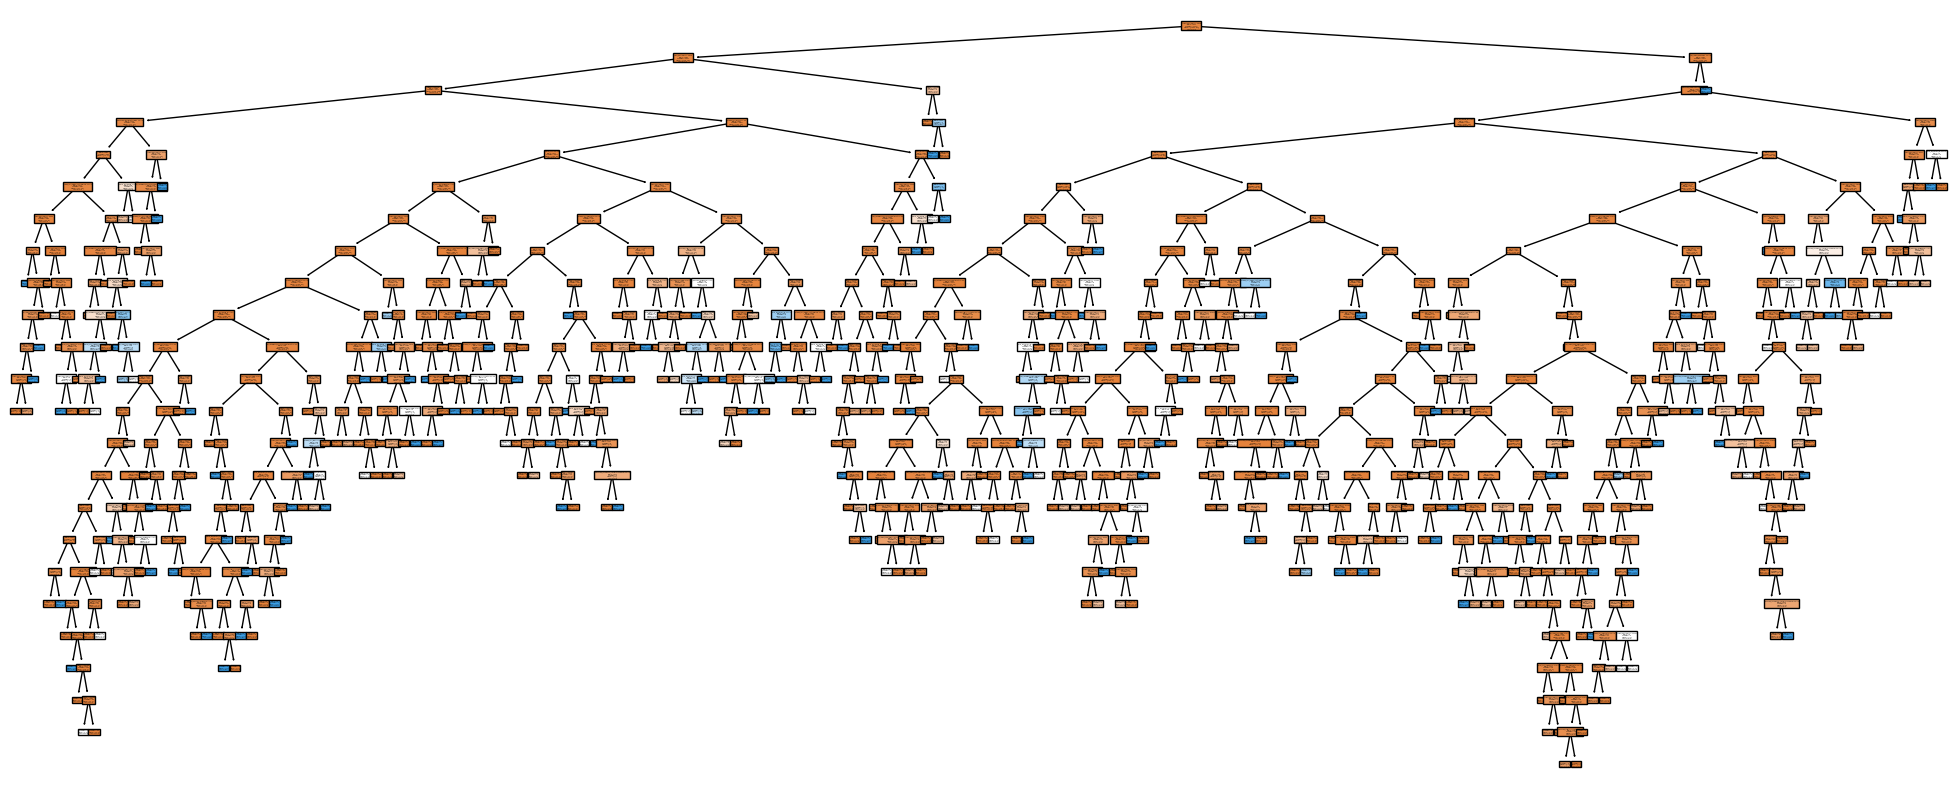

In [7]:
"""
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.. df_var(X) e def_index(y).
"""
plt.figure(figsize=(25, 10))

plot_tree(clf_train,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=list(df_var.columns));

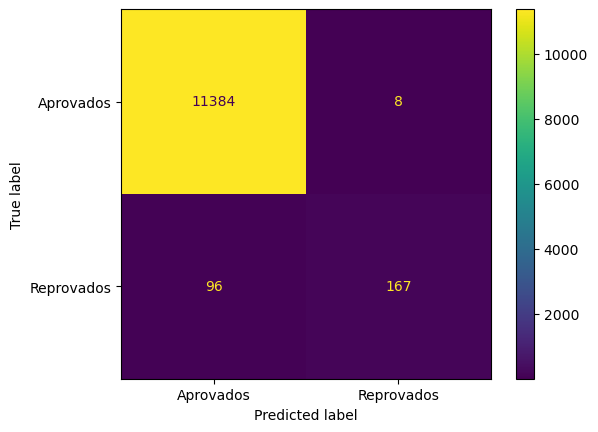

In [8]:
"""
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e
"reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

Matriz de confusão treino. df_var(X) e df_index(y).
"""
ConfusionMatrixDisplay.from_estimator(clf_train, df_var_train, df_index_train, display_labels=['Aprovados', 'Reprovados']);

In [9]:
"""
5. Calcule a acurácia na base de treinamento
"""
predict_train = clf_train.predict(df_var_train)

print('A acuracia do treino é de {:.2f} %.'.format(accuracy_score(df_index_train, predict_train)*100))

A acuracia do treino é de 99.11 %.


### 3. Vamos avaliar o modelo na base de testes: <a name="dicionario"></a>   
     
<div style="text-align: right"
     
[Voltar ao índice](#questoes)

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [10]:
"""
1. Classifique a base de teste de acordo com a árvore que você treinou no item 2. df_var_test(X) e df_index_test(y).
"""
clf = DecisionTreeClassifier(random_state=100)

clf_test = clf.fit(df_var_test, df_index_test)
clf_test

DecisionTreeClassifier(random_state=100)

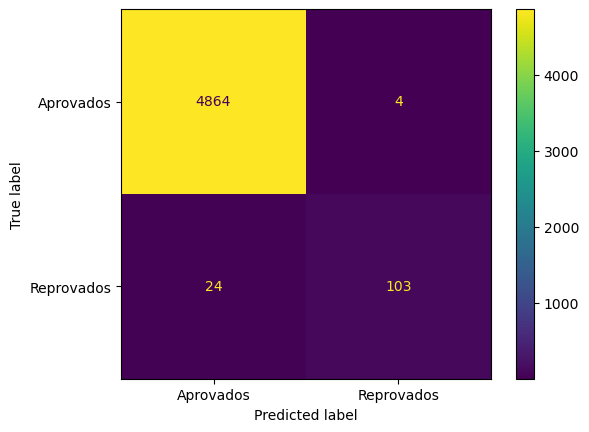

In [11]:
"""
2. Produza a visualização da matriz de confusão para a base de teste. df_var(X) e def_index(y).
"""
ConfusionMatrixDisplay.from_estimator(clf_test, df_var_test, df_index_test, display_labels=['Aprovados', 'Reprovados']);

In [12]:
"""
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
"""
predict_test = clf_test.predict(df_var_test)

print('E a acuracia do teste é de {:.2f} %.'.format(accuracy_score(df_index_test, predict_test)*100))

E a acuracia do teste é de 99.44 %.


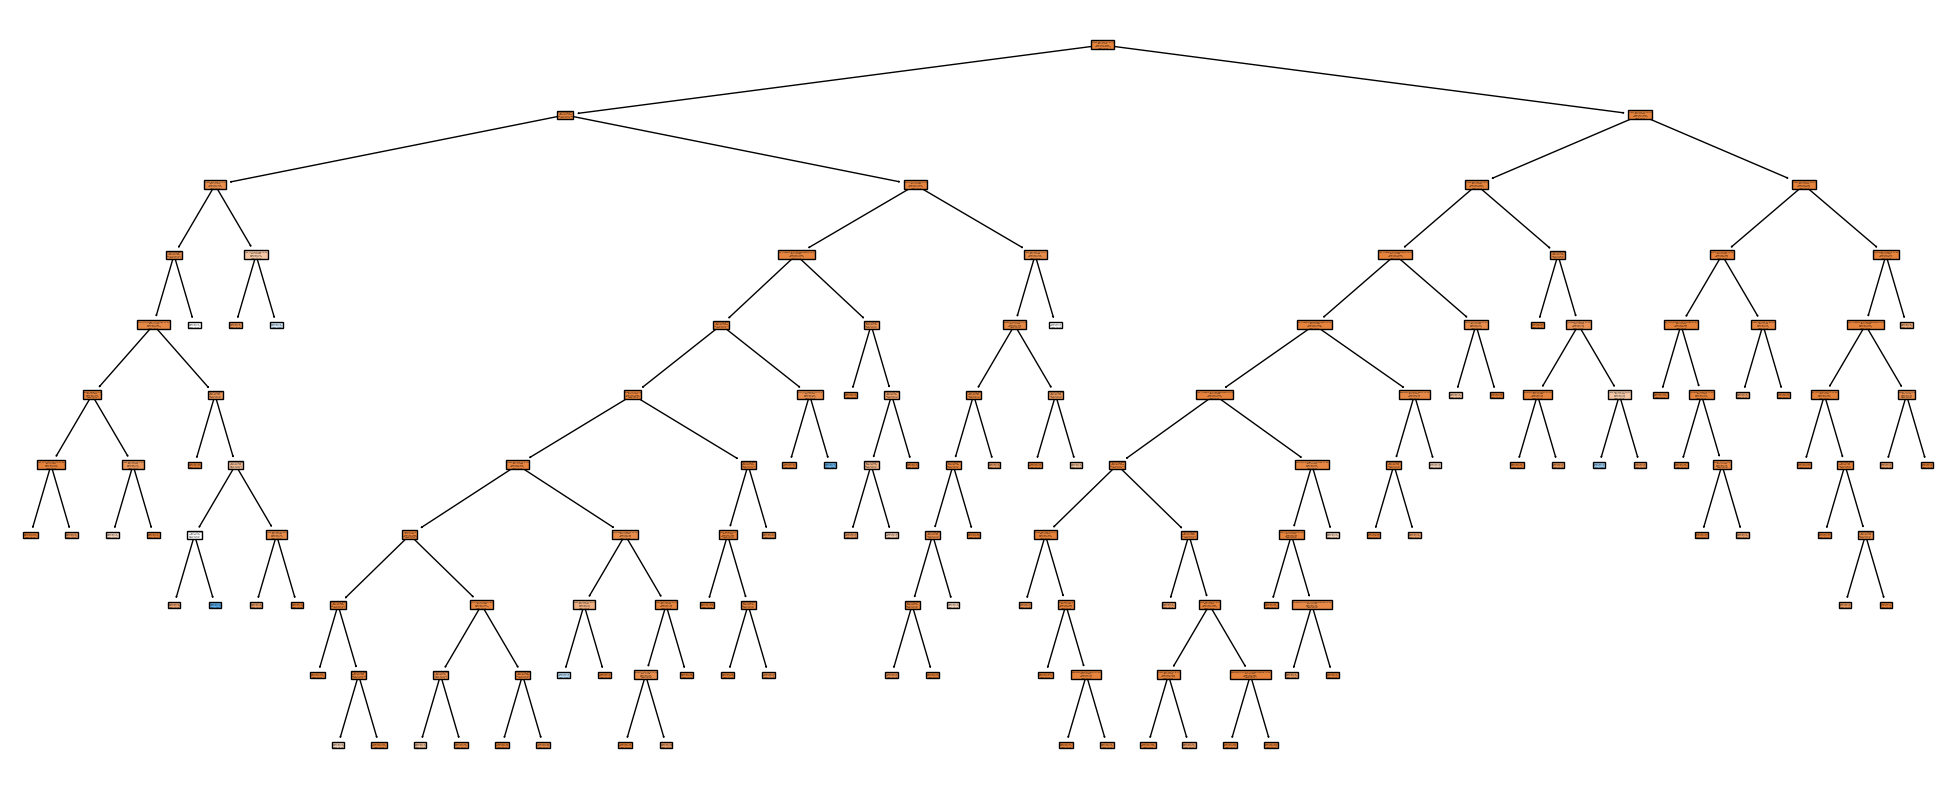

In [13]:
"""
4. A) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
Use o random_state = 123.
"""
clf_novo = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

clf_train_new = clf_novo.fit(df_var_train, df_index_train)

clf_test_new = clf_novo.fit(df_var_test, df_index_test)

plt.figure(figsize=(25, 10))

plot_tree(clf_train_new,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=list(df_var.columns));

O percentual de reprovados no treino é de 0.51 %.

E o percentual de reprovados no teste é de 0.64 %.


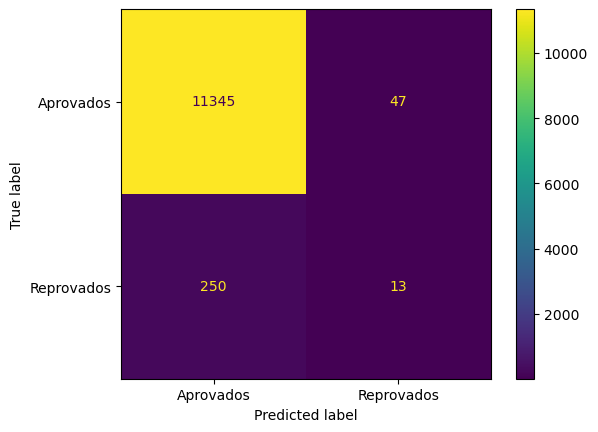

In [14]:
"""
4. B) Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados
como 'maus'?
"""
ConfusionMatrixDisplay.from_estimator(clf_train_new, df_var_train, df_index_train, display_labels=['Aprovados', 'Reprovados']);

predict_train_new = clf_train_new.predict(df_var_train)

print('O percentual de reprovados no treino é de {:.2f} %.'.format(((predict_train_new == 1).sum() / len(predict_train_new))*100))
print('')

predict_test_new = clf_test_new.predict(df_var_test)

print('E o percentual de reprovados no teste é de {:.2f} %.'.format(((predict_test_new == 1).sum() / len(predict_test_new))*100))

In [15]:
"""
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
"""
# Alterando todos os valores da coluna mau para bons pagadores

df_credito_ii = df_credito
df_credito_ii['mau'] = df_credito_ii['mau'].replace(True, False)

# Criei o df_var_ii (X) e o df_index_ii(y)

df_index_ii = df_credito.mau
df_var_ii = df_credito.drop('mau',axis=1)

#Separei 70% da base para treinamento e 30% para validação. 

df_var_train_ii, df_var_test_ii, df_index_train_ii, df_index_test_ii= train_test_split(df_var_ii
                                                                                       ,df_index_ii
                                                                                       ,test_size=0.3
                                                                                       ,random_state=100)

# Criei uma nova arvore

clf_ii = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_train_ii = clf_ii.fit(df_var_train_ii, df_index_train_ii)
clf_test_ii = clf_ii.fit(df_var_test_ii, df_index_test_ii)

# Acuracia de treino e teste

predict_train_ii = clf_train_ii.predict(df_var_train_ii)
print('A acuracia do treino é de {:.2f} %.'.format(accuracy_score(df_index_train_ii, predict_train_ii)*100))
print('')
predict_test_ii = clf_test_ii.predict(df_var_test_ii)
print('E a acuracia do teste é de {:.2f} %.'.format(accuracy_score(df_index_test_ii, predict_test_ii)*100))
print('')

A acuracia do treino é de 97.45 %.

E a acuracia do teste é de 97.70 %.

